# Predicting Heart Disease using Machine Learining
Machine learning model capable of predicting whether or not based on their clinical parameters


In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 39.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
# Import all tools we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score

# Import the sklearn.metrics module
import sklearn.metrics

# Load Data

In [ ]:
df= pd.read_csv("modified_expanded_heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(2500, 14)

##Data Exploration EDA (Exploratory data analysis


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2500 non-null   int64  
 1   sex       2500 non-null   int64  
 2   cp        2500 non-null   int64  
 3   trestbps  2500 non-null   int64  
 4   chol      2500 non-null   int64  
 5   fbs       2500 non-null   int64  
 6   restecg   2500 non-null   int64  
 7   thalach   2500 non-null   int64  
 8   exang     2500 non-null   int64  
 9   oldpeak   2500 non-null   float64
 10  slope     2500 non-null   int64  
 11  ca        2500 non-null   int64  
 12  thal      2500 non-null   int64  
 13  target    2500 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 273.6 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,53.765600,0.682400,2.009600,131.689600,245.400000,0.770800,0.508400,149.849600,0.315200,1.243560,1.051200,0.809200,1.623600,0.548400
std,9.283552,0.465636,1.045153,17.480855,51.704852,0.420402,0.525014,22.426648,0.464688,0.920238,0.938579,1.069043,0.678017,0.497751
min,14.000000,0.000000,0.000000,69.000000,47.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,1.000000,120.000000,211.000000,1.000000,0.000000,135.000000,0.000000,0.500000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,2.000000,132.000000,246.000000,1.000000,0.000000,150.000000,0.000000,1.100000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,3.000000,143.000000,279.000000,1.000000,1.000000,165.000000,1.000000,1.800000,2.000000,2.000000,2.000000,1.000000
max,86.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,226.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df["target"].value_counts()

target
1    1371
0    1129
Name: count, dtype: int64

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.sex.value_counts()

sex
1    1706
0     794
Name: count, dtype: int64

In [ ]:
# compare target with sex coloumn
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,346,783
1,448,923


##Finding patterns...


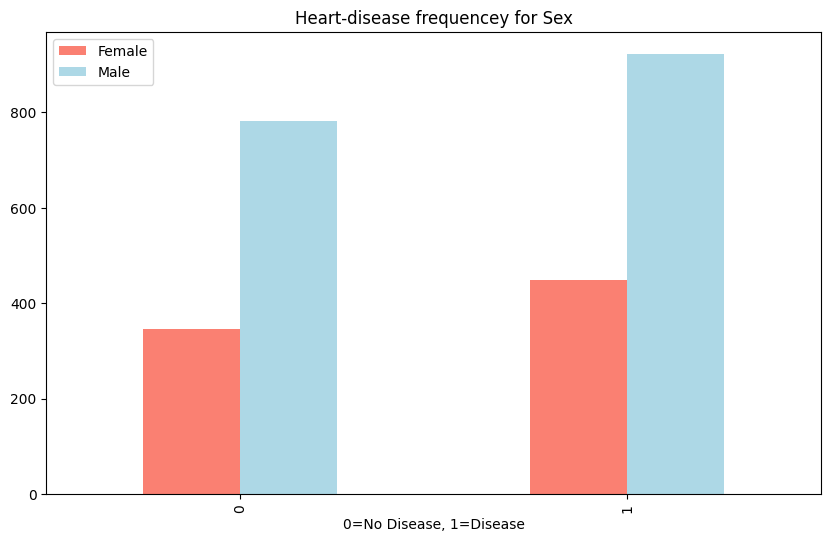

In [ ]:
# creating plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',figsize=(10,6),color=["salmon","lightblue"])

plt.title("Heart-disease frequencey for Sex")
plt.xlabel("0=No Disease, 1=Disease")
plt.ylabel=("Amount")
plt.legend(["Female","Male"])

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Now, Comparing some independent variables

## Age vs. thalach (Max Heart Rate) for Heart Disease

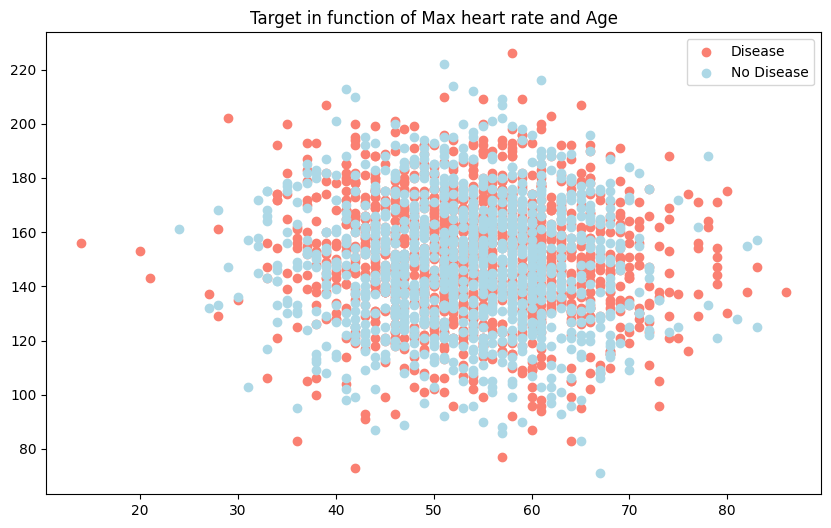

In [ ]:

# Assuming df is already defined and loaded with the relevant data
plt.figure(figsize=(10,6))

# Scatter with true values
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with false values
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

plt.title("Target in function of Max heart rate and Age")
plt.legend(["Disease","No Disease"])

<Axes: ylabel='Frequency'>

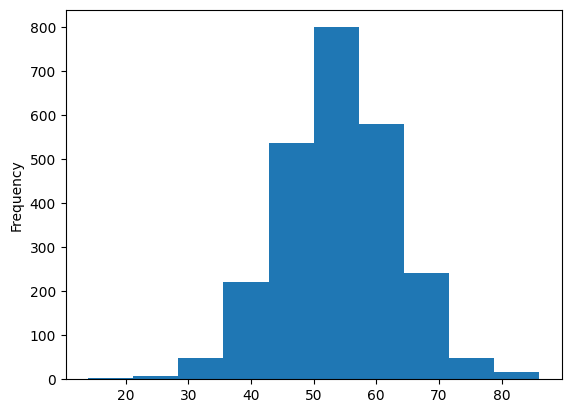

In [ ]:
# Checking distribution of age column with histrogram
df.age.plot.hist()

##Heart Disease per cp (Chest pain type)



*   0- Typical Angina
*   1- Atypical Angina
*   2- Non-Anginal Pain
*   3- Asymptomatic







In [ ]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,183,127
1,182,241
2,292,408
3,472,595


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

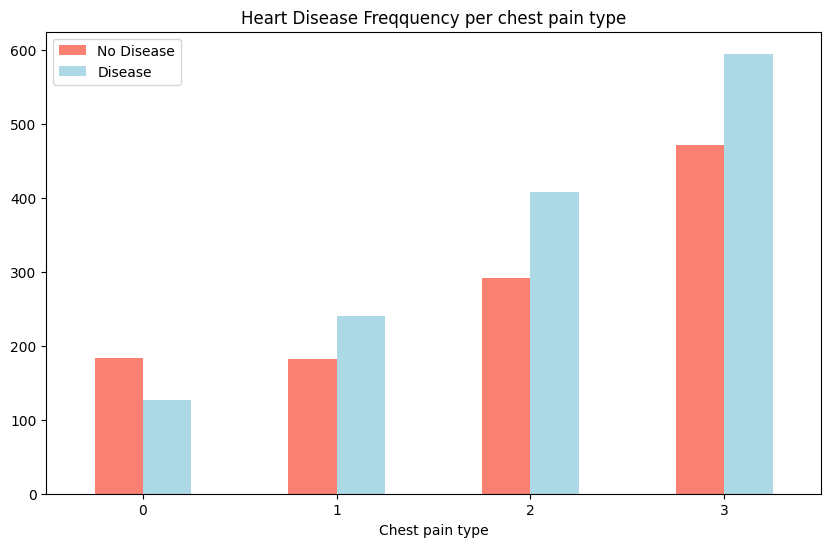

In [ ]:
# Making crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])

plt.title("Heart Disease Freqquency per chest pain type")
plt.xlabel("Chest pain type")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0)

In [ ]:
# Making a corelation matrix
# useful way to analyze relationships between variables in a dataset.
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.003436,-0.009996,0.014960,0.020009,-0.009670,-0.001813,-0.052352,0.005446,0.011664,-0.016533,0.042022,-0.013641,0.034757
sex,-0.003436,1.000000,-0.002777,-0.020179,-0.037753,-0.022455,0.027286,0.008069,0.037485,0.024175,-0.017715,0.006837,0.017920,-0.021703
cp,-0.009996,-0.002777,1.000000,0.012823,-0.037385,0.227227,0.035587,0.050629,-0.050725,-0.001017,-0.049453,-0.003732,-0.190283,0.066796
trestbps,0.014960,-0.020179,0.012823,1.000000,0.067436,0.018902,-0.037954,0.003995,0.008946,0.008886,-0.003348,0.015716,0.006648,-0.018324
chol,0.020009,-0.037753,-0.037385,0.067436,1.000000,0.008527,-0.065103,-0.002277,0.027461,-0.001240,0.004773,0.008729,0.034682,-0.001421
fbs,-0.009670,-0.022455,0.227227,0.018902,0.008527,1.000000,-0.006684,0.018879,0.003297,0.041539,-0.096001,0.021077,-0.183454,-0.020589
restecg,-0.001813,0.027286,0.035587,-0.037954,-0.065103,-0.006684,1.000000,0.023082,0.007185,0.001437,-0.001685,-0.015324,0.004951,0.015288
thalach,-0.052352,0.008069,0.050629,0.003995,-0.002277,0.018879,0.023082,1.000000,-0.039991,-0.037609,0.016905,-0.001081,-0.024830,0.057291
exang,0.005446,0.037485,-0.050725,0.008946,0.027461,0.003297,0.007185,-0.039991,1.000000,0.062112,-0.055366,0.005921,0.035058,-0.027922
oldpeak,0.011664,0.024175,-0.001017,0.008886,-0.001240,0.041539,0.001437,-0.037609,0.062112,1.000000,-0.080047,0.034281,-0.002123,-0.044485


(14.5, -0.5)

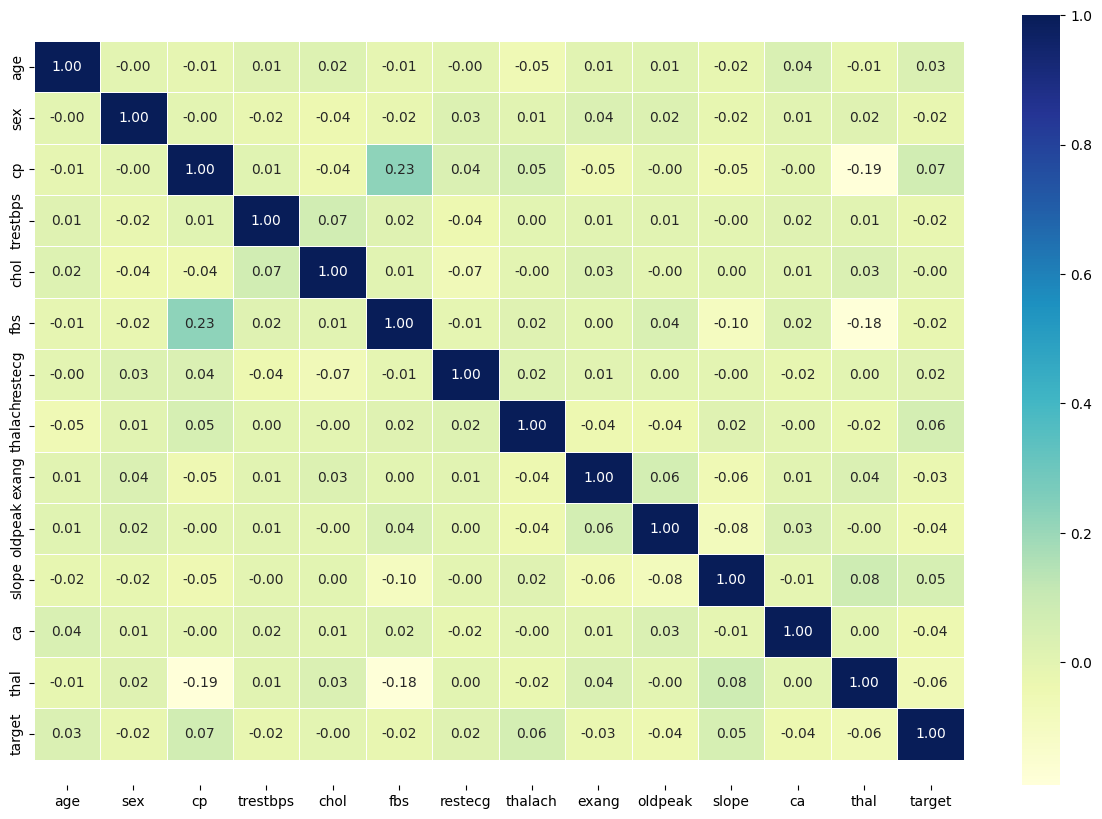

In [ ]:
# Make a little prettier
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               cmap="YlGnBu");
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

##Modeling...

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#spliting data to x and y
X=df.drop("target",axis=1)
y=df["target"]

In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2495    0
2496    0
2497    1
2498    0
2499    1
Name: target, Length: 2500, dtype: int64

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,51,1,2,153,300,0,0,92,0,0.7,0,0,1
2496,58,1,3,141,248,1,1,104,1,1.3,2,2,2
2497,53,1,3,127,179,1,0,141,0,0.7,0,0,1
2498,31,0,3,132,278,1,1,157,1,0.3,0,0,2


In [ ]:
np.random.seed(42)
# Split into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
2055,28,0,2,136,210,1,1,161,1,0.7,0,0,2
1961,48,1,1,95,296,1,1,139,0,1.6,0,4,2
1864,50,1,1,107,254,0,0,167,0,1.1,0,0,1
2326,47,1,2,118,352,1,1,144,1,0.8,2,0,1
461,46,0,1,124,196,1,0,159,0,1.7,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,44,0,2,122,253,1,0,176,0,2.0,0,0,3
1095,62,0,3,140,216,1,1,140,0,1.6,0,0,2
1130,55,1,1,139,239,1,0,159,0,1.6,2,2,2
1294,51,0,3,93,197,1,1,176,0,0.1,0,2,2


In [ ]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
1447,51,1,3,96,233,1,0,185,0,0.5,0,2,2
1114,57,1,3,140,279,1,1,175,0,1.0,0,0,1
1064,65,1,0,137,228,0,1,95,1,1.9,2,3,1
2287,62,0,3,135,292,1,1,136,0,0.2,0,0,1
1537,48,1,1,130,165,1,0,129,1,0.6,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,46,1,0,103,267,1,0,147,0,1.0,0,0,1
1609,28,1,3,143,244,1,1,129,0,2.8,0,1,2
596,63,0,3,156,205,1,1,168,0,1.5,2,2,3
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2


In [ ]:
y_train, len(y_train)

(2055    1
 1961    1
 1864    1
 2326    0
 461     1
        ..
 1638    1
 1095    0
 1130    1
 1294    1
 860     0
 Name: target, Length: 2000, dtype: int64,
 2000)

##Now, We'll use 3 diff models for experimentation`
* logistic regression
* Knn classifier
* random forest

In [ ]:
models={"Logistic Regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier()}

# Function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
  np.random.seed(42)

  # Dictionary to keep model scores
  model_scores={}
  # Loop through models
  for name,model in models.items():
    model.fit(X_train,y_train)
    model_scores[name]=model.score(X_test,y_test)
  return model_scores

In [ ]:
model_scores=fit_and_score(models=models,
              X_train=X_train,
              X_test=X_test,
              y_train=y_train,
              y_test=y_test)

model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.524, 'KNN': 0.486, 'Random Forest': 0.532}

<Axes: >

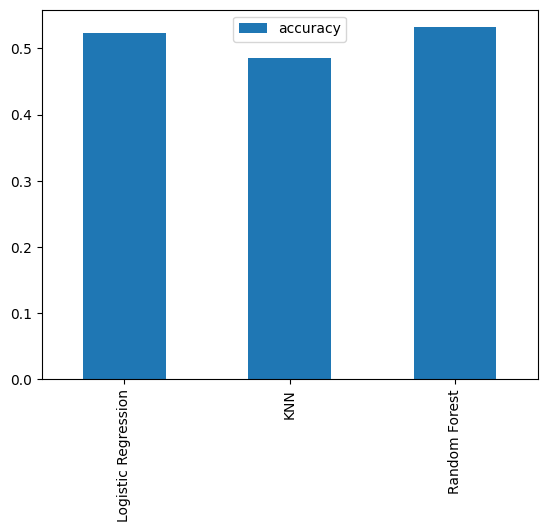

In [ ]:
# Visual Comparision
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()

##Hyperparameter Tuning

In [ ]:
# Start with KNN
train_scores=[]
test_scores=[]

neighbors=range(1,21)

knn=KNeighborsClassifier()

for i in neighbors:
  knn.set_params(n_neighbors=i)

  knn.fit(X_train,y_train)

  train_scores.append(knn.score(X_train,y_train))

  test_scores.append(knn.score(X_test,y_test))


In [ ]:
train_scores

[1.0,
 0.7475,
 0.752,
 0.6915,
 0.693,
 0.667,
 0.654,
 0.6445,
 0.6455,
 0.62,
 0.6275,
 0.616,
 0.628,
 0.61,
 0.6175,
 0.609,
 0.615,
 0.6115,
 0.615,
 0.6035]

In [ ]:
test_scores

[0.51,
 0.488,
 0.494,
 0.484,
 0.486,
 0.498,
 0.512,
 0.51,
 0.508,
 0.504,
 0.494,
 0.498,
 0.484,
 0.486,
 0.488,
 0.488,
 0.492,
 0.468,
 0.494,
 0.482]

maximum score achieved on test data is 51.20


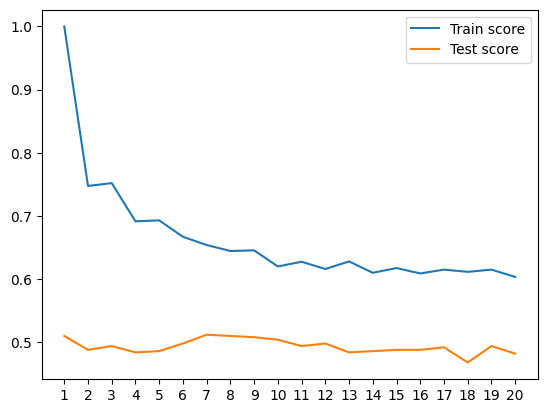

In [ ]:
# Represent knn tuning visualy
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.legend()

print(f"maximum score achieved on test data is {max(test_scores)*100:.2f}")


# Hyperparameter tuning with Randomized Search CV
## We're going to tune LogisticRegression() and RandomForestClassifier()

In [ ]:
# We're adjusting "C" and "solver" hyperparameter in logistic regression grid
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}

# For Random Forest Classifier, We're adjusting "n_estimators" like how many trees in that forest

rf_grid={'n_estimators':np.arange(10,1000,50),
                                              "max_depth":[None,3,5,10],
                                              "min_samples_split":np.arange(2,20,2),
                                              "min_samples_leaf":np.arange(1,20,2)}

In [ ]:
# Tuning logistic regression
np.random.seed(42)

# setup random hyperparameter search

rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)

# Fitting random hyperparameter search
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.score(X_test,y_test)

0.522

In [ ]:
# Tuning Random Forest
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)

rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [ ]:
rs_rf.score(X_test,y_test)

0.568

# Hyperparameter tuning with GridSearchCv

In [ ]:
# Taking too long to tune with them so we switched to logistic regression

# refined_rf_grid = {'n_estimators': [560, 620, 10],
#                    'max_depth': [2, 3, 4],
#                    'min_samples_split': [2, 4, 6],
#                    'min_samples_leaf': [13, 15, 17]}

# gs_rf = GridSearchCV(RandomForestClassifier(),
#                      param_grid=refined_rf_grid,
#                      cv=5,
#                      verbose=True,
#                   )

In [ ]:
# Tuning with GridSearchCv For logistic regresssion model
log_reg_grid={"C":np.logspace(-4,4,30),
              "solver":["liblinear"]}

gs_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
gs_log_reg.best_params_

{'C': 2.592943797404667, 'solver': 'liblinear'}

In [ ]:
gs_log_reg.score(X_test,y_test)

0.522

In [ ]:
# Make predictions with tuned model
y_preds=gs_log_reg.predict(X_test)

In [ ]:
y_preds

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,

In [ ]:
y_test

1447    0
1114    0
1064    1
2287    0
1537    0
       ..
2375    1
1609    1
596     1
84      1
2213    0
Name: target, Length: 500, dtype: int64

Text(0.5, 1.0, '(ROC) Curve')

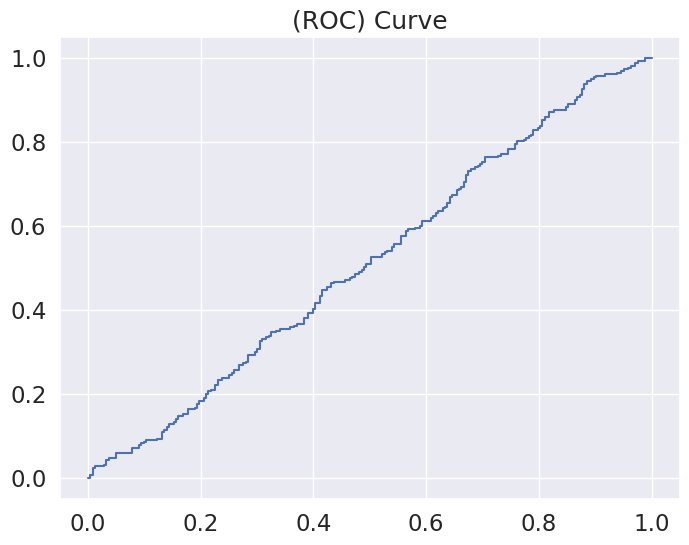

In [ ]:
from sklearn.metrics import roc_curve

# Calculate predicted probabilities for the positive class
y_probs = gs_log_reg.predict_proba(X_test)[:, 1]

# Generate ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
# plt.plot([0, 1], [0, 1], 'k--', label='Random')  # Diagonal line for random classifier
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')

In [ ]:
print (confusion_matrix(y_test,y_preds))

[[ 60 183]
 [ 56 201]]


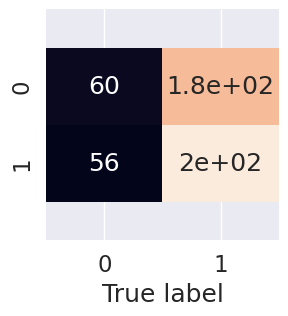

In [ ]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
  fig,ax=plt.subplots(figsize=(3,3))
  ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                 annot=True,
                 cbar=False)
  plt.xlabel("True label")
  bottom,top=ax.get_ylim()
  ax.set_ylim(bottom+0.5,top-0.5)

  # plt.ylabel("Predicted label")

plot_conf_mat(y_test,y_preds)

In [ ]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.52      0.25      0.33       243
           1       0.52      0.78      0.63       257

    accuracy                           0.52       500
   macro avg       0.52      0.51      0.48       500
weighted avg       0.52      0.52      0.48       500



# Calculate evaluation metrics using cross validation

In [ ]:
#Check best hyperparameter

gs_log_reg.best_params_

{'C': 2.592943797404667, 'solver': 'liblinear'}

In [ ]:
clf=LogisticRegression(C=2.592943797404667,solver="liblinear")

In [ ]:
# Cross-validated accuracy
cv_acc=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc

array([0.528, 0.566, 0.53 , 0.51 , 0.546])

In [ ]:
cv_acc=np.mean(cv_acc)
cv_acc

0.5359999999999999

In [ ]:
# Cross-validated precision
cv_precision=cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.5548031812079033

In [ ]:
import pandas as pd

last_names = ['Connor', 'Connor', 'Reese']
first_names = ['Sarah', 'John', 'Kyle']
df = pd.DataFrame({
  'first_name': first_names,
  'last_name': last_names,
})
df

<Axes: title={'center': 'Cross-validated classification report'}>

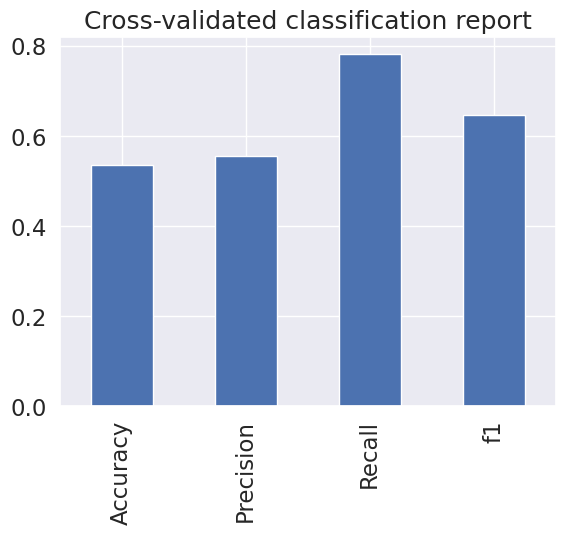

In [ ]:
# Visualize cross-validated metrics
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                         "Precision":cv_precision,
                         "Recall":cv_recall,
                         "f1":cv_f1},
                        index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification report",
                      legend=False)

# Feature Importance
## It's like anoter way of asking which feature contributed most to the outcomes

In [ ]:
gs_log_reg.best_params_

{'C': 2.592943797404667, 'solver': 'liblinear'}

In [ ]:
# Fit the instance of logistic regresion
clf=LogisticRegression(C=2.592943797404667,
                       solver="liblinear")

clf.fit(X_train,y_train)

LogisticRegression(C=2.592943797404667, solver='liblinear')

In [ ]:
clf.coef_

array([[ 0.01014452, -0.10012567,  0.14477495, -0.00406683,  0.00056087,
        -0.28487075,  0.05952525,  0.00330007, -0.06719795, -0.0969347 ,
         0.13813335, -0.09996382, -0.19557374]])

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Match coef_ to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.010144520000659397,
 'sex': -0.10012567199957616,
 'cp': 0.1447749530557871,
 'trestbps': -0.004066829687222468,
 'chol': 0.0005608700757291936,
 'fbs': -0.2848707451200897,
 'restecg': 0.05952525383791303,
 'thalach': 0.003300072397608484,
 'exang': -0.06719795273872001,
 'oldpeak': -0.09693469627982121,
 'slope': 0.138133351151512,
 'ca': -0.09996382425036791,
 'thal': -0.19557373999427388}

<Axes: title={'center': 'Feature Importance'}>

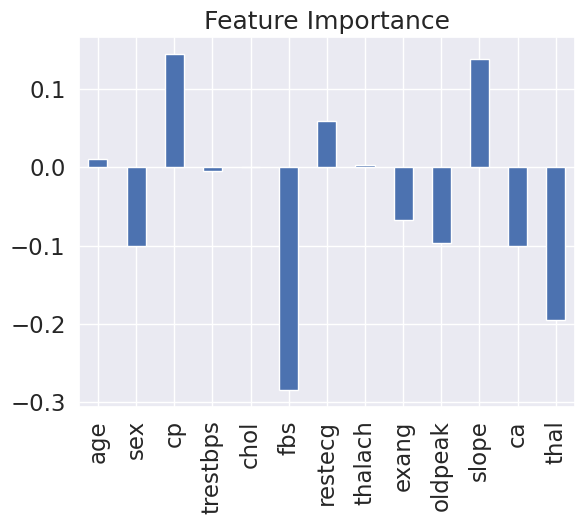

In [ ]:
# Visualize Feature Importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False)

In [ ]:
best_model = GridSearchCV.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


NameError: name 'GridSearchCV' is not defined

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))





NameError: name 'grid_search' is not defined